## **Polaris - Guide** 

### **1) Installation**

In [2]:
!pip install polars

##

### **2) Input and Output**

In [3]:
#Read CSV data
import polars as pl
df = pl.read_csv("/home/deepchand-o-a/youtube/polars/df_Customers.csv")

In [4]:
print(df.head())

shape: (5, 4)
┌──────────────┬──────────────────────────┬────────────────────┬────────────────┐
│ customer_id  ┆ customer_zip_code_prefix ┆ customer_city      ┆ customer_state │
│ ---          ┆ ---                      ┆ ---                ┆ ---            │
│ str          ┆ i64                      ┆ str                ┆ str            │
╞══════════════╪══════════════════════════╪════════════════════╪════════════════╡
│ hCT0x9JiGXBQ ┆ 58125                    ┆ varzea paulista    ┆ SP             │
│ PxA7fv9spyhx ┆ 3112                     ┆ armacao dos buzios ┆ RJ             │
│ g3nXeJkGI0Qw ┆ 4119                     ┆ jandira            ┆ SP             │
│ EOEsCQ6QlpIg ┆ 18212                    ┆ uberlandia         ┆ MG             │
│ mVz5LO2Vd6cL ┆ 88868                    ┆ ilhabela           ┆ SP             │
└──────────────┴──────────────────────────┴────────────────────┴────────────────┘


In [5]:
# write to CSV
df = pl.DataFrame({"foo": [1, 2, 3], "bar": [None, "bak", "baz"]})
df.write_csv("/home/deepchand-o-a/youtube/polars/example.csv")

### **3) Data Frame Creation**

#### 3.1 Series

In [6]:
# Series are a 1-dimensional data structure.
#  Within a series all elements have the same Data Type .
import polars as pl

s = pl.Series("a", [1, 2, 3, 4, 5])
print(s)

shape: (5,)
Series: 'a' [i64]
[
	1
	2
	3
	4
	5
]


#### 3.2 DataFrame

In [7]:
# A DataFrame is a 2-dimensional data structure that is backed by a Series
# Operations that can be executed on a DataFrame are very similar to what is done in a SQL like query. 
# You can GROUP BY, JOIN, PIVOT, but also define custom functions.

from datetime import datetime

df = pl.DataFrame(
    {
        "integer": [1, 2, 3, 4, 5],
        "date": [
            datetime(2022, 1, 1),
            datetime(2022, 1, 2),
            datetime(2022, 1, 3),
            datetime(2022, 1, 4),
            datetime(2022, 1, 5),
        ],
        "float": [4.0, 5.0, 6.0, 7.0, 8.0],
    }
)

print(df)

shape: (5, 3)
┌─────────┬─────────────────────┬───────┐
│ integer ┆ date                ┆ float │
│ ---     ┆ ---                 ┆ ---   │
│ i64     ┆ datetime[μs]        ┆ f64   │
╞═════════╪═════════════════════╪═══════╡
│ 1       ┆ 2022-01-01 00:00:00 ┆ 4.0   │
│ 2       ┆ 2022-01-02 00:00:00 ┆ 5.0   │
│ 3       ┆ 2022-01-03 00:00:00 ┆ 6.0   │
│ 4       ┆ 2022-01-04 00:00:00 ┆ 7.0   │
│ 5       ┆ 2022-01-05 00:00:00 ┆ 8.0   │
└─────────┴─────────────────────┴───────┘


### **4) Data Inspection**

#### 4.1 df.head()

In [8]:
print(df.head(3))

shape: (3, 3)
┌─────────┬─────────────────────┬───────┐
│ integer ┆ date                ┆ float │
│ ---     ┆ ---                 ┆ ---   │
│ i64     ┆ datetime[μs]        ┆ f64   │
╞═════════╪═════════════════════╪═══════╡
│ 1       ┆ 2022-01-01 00:00:00 ┆ 4.0   │
│ 2       ┆ 2022-01-02 00:00:00 ┆ 5.0   │
│ 3       ┆ 2022-01-03 00:00:00 ┆ 6.0   │
└─────────┴─────────────────────┴───────┘


#### 4.2 df.tail()

In [9]:
print(df.tail(3))

shape: (3, 3)
┌─────────┬─────────────────────┬───────┐
│ integer ┆ date                ┆ float │
│ ---     ┆ ---                 ┆ ---   │
│ i64     ┆ datetime[μs]        ┆ f64   │
╞═════════╪═════════════════════╪═══════╡
│ 3       ┆ 2022-01-03 00:00:00 ┆ 6.0   │
│ 4       ┆ 2022-01-04 00:00:00 ┆ 7.0   │
│ 5       ┆ 2022-01-05 00:00:00 ┆ 8.0   │
└─────────┴─────────────────────┴───────┘


#### 4.3 df.describe()

In [10]:
print(df.describe())

shape: (9, 4)
┌────────────┬──────────┬─────────────────────┬──────────┐
│ statistic  ┆ integer  ┆ date                ┆ float    │
│ ---        ┆ ---      ┆ ---                 ┆ ---      │
│ str        ┆ f64      ┆ str                 ┆ f64      │
╞════════════╪══════════╪═════════════════════╪══════════╡
│ count      ┆ 5.0      ┆ 5                   ┆ 5.0      │
│ null_count ┆ 0.0      ┆ 0                   ┆ 0.0      │
│ mean       ┆ 3.0      ┆ 2022-01-03 00:00:00 ┆ 6.0      │
│ std        ┆ 1.581139 ┆ null                ┆ 1.581139 │
│ min        ┆ 1.0      ┆ 2022-01-01 00:00:00 ┆ 4.0      │
│ 25%        ┆ 2.0      ┆ 2022-01-02 00:00:00 ┆ 5.0      │
│ 50%        ┆ 3.0      ┆ 2022-01-03 00:00:00 ┆ 6.0      │
│ 75%        ┆ 4.0      ┆ 2022-01-04 00:00:00 ┆ 7.0      │
│ max        ┆ 5.0      ┆ 2022-01-05 00:00:00 ┆ 8.0      │
└────────────┴──────────┴─────────────────────┴──────────┘


### **5) Data Selection and Filtering**

#### 5.1 Select()

In [11]:
# Used to select by columns names
import polars as pl
df = pl.read_csv("/home/deepchand-o-a/youtube/polars/df_Customers.csv")


df.select('customer_state')

customer_state
str
"""SP"""
"""RJ"""
"""SP"""
"""MG"""
"""SP"""
…
"""SP"""
"""SP"""
"""SP"""


#### 5.2 filter()

In [12]:
# Used for Filtering data based on conditions
df.filter(pl.col('customer_state') == "SP")

customer_id,customer_zip_code_prefix,customer_city,customer_state
str,i64,str,str
"""hCT0x9JiGXBQ""",58125,"""varzea paulista""","""SP"""
"""g3nXeJkGI0Qw""",4119,"""jandira""","""SP"""
"""mVz5LO2Vd6cL""",88868,"""ilhabela""","""SP"""
"""85jiDiGSfhTu""",4762,"""guarulhos""","""SP"""
"""gDdkaN8b9s1g""",75870,"""mogi-guacu""","""SP"""
…,…,…,…
"""xJEzC2usouPl""",5414,"""sao paulo""","""SP"""
"""bfJtzkBGksdY""",94060,"""amparo""","""SP"""
"""4hjsCpj6FC7g""",99835,"""itapevi""","""SP"""


### **6) Data Cleaning**

#### 6.1 Dataframe with NULL Value

In [13]:
df = pl.DataFrame(
    {
        "value": [1, None,3,4,5],
    },
)
print(df)

shape: (5, 1)
┌───────┐
│ value │
│ ---   │
│ i64   │
╞═══════╡
│ 1     │
│ null  │
│ 3     │
│ 4     │
│ 5     │
└───────┘


#### 6.1 count No of NULL in dataset

In [14]:
null_count_df = df.null_count()
print(null_count_df)

shape: (1, 1)
┌───────┐
│ value │
│ ---   │
│ u32   │
╞═══════╡
│ 1     │
└───────┘


#### 6.2 See where NULL is present in dataset

In [15]:
is_null_series = df.select(
    pl.col("value").is_null(),
)
print(is_null_series)

shape: (5, 1)
┌───────┐
│ value │
│ ---   │
│ bool  │
╞═══════╡
│ false │
│ true  │
│ false │
│ false │
│ false │
└───────┘


#### 6.3 Drop NULL values

In [16]:
df = df.drop_nulls()
print(df)


shape: (4, 1)
┌───────┐
│ value │
│ ---   │
│ i64   │
╞═══════╡
│ 1     │
│ 3     │
│ 4     │
│ 5     │
└───────┘


#### 6.4 Fill NULL values with specific values

In [17]:
df = pl.DataFrame(
    {
        "col1": [1, 2, 3],
        "col2": [1, None, 3],
    },
)
print(df)

shape: (3, 2)
┌──────┬──────┐
│ col1 ┆ col2 │
│ ---  ┆ ---  │
│ i64  ┆ i64  │
╞══════╪══════╡
│ 1    ┆ 1    │
│ 2    ┆ null │
│ 3    ┆ 3    │
└──────┴──────┘


In [18]:
fill_literal_df = df.with_columns(pl.col("col2").fill_null(pl.lit(2)),)
print(fill_literal_df)

shape: (3, 2)
┌──────┬──────┐
│ col1 ┆ col2 │
│ ---  ┆ ---  │
│ i64  ┆ i64  │
╞══════╪══════╡
│ 1    ┆ 1    │
│ 2    ┆ 2    │
│ 3    ┆ 3    │
└──────┴──────┘


#### 6.5 Find Duplicates

In [19]:
import polars as pl

# Create a sample DataFrame
data = {
    "customer_id": [1, 2, 3, 4, 5, 3],
    "customer_name": ["Alice", "Bob", "Charlie", "David", "Eve", "Charlie"],
    "customer_state": ["CA", "NY", "TX", "CA", "NY", "TX"]
}

df = pl.DataFrame(data)
print("Original DataFrame:")
print(df)


Original DataFrame:
shape: (6, 3)
┌─────────────┬───────────────┬────────────────┐
│ customer_id ┆ customer_name ┆ customer_state │
│ ---         ┆ ---           ┆ ---            │
│ i64         ┆ str           ┆ str            │
╞═════════════╪═══════════════╪════════════════╡
│ 1           ┆ Alice         ┆ CA             │
│ 2           ┆ Bob           ┆ NY             │
│ 3           ┆ Charlie       ┆ TX             │
│ 4           ┆ David         ┆ CA             │
│ 5           ┆ Eve           ┆ NY             │
│ 3           ┆ Charlie       ┆ TX             │
└─────────────┴───────────────┴────────────────┘


In [20]:
# Identify duplicates in the 'customer_id' column
df = df.with_columns(pl.col('customer_id').is_duplicated().alias('is_duplicate'))

print("\nDataFrame with 'is_duplicate' column:")
print(df)



DataFrame with 'is_duplicate' column:
shape: (6, 4)
┌─────────────┬───────────────┬────────────────┬──────────────┐
│ customer_id ┆ customer_name ┆ customer_state ┆ is_duplicate │
│ ---         ┆ ---           ┆ ---            ┆ ---          │
│ i64         ┆ str           ┆ str            ┆ bool         │
╞═════════════╪═══════════════╪════════════════╪══════════════╡
│ 1           ┆ Alice         ┆ CA             ┆ false        │
│ 2           ┆ Bob           ┆ NY             ┆ false        │
│ 3           ┆ Charlie       ┆ TX             ┆ true         │
│ 4           ┆ David         ┆ CA             ┆ false        │
│ 5           ┆ Eve           ┆ NY             ┆ false        │
│ 3           ┆ Charlie       ┆ TX             ┆ true         │
└─────────────┴───────────────┴────────────────┴──────────────┘


#### 6.6 Remove Duplicates

In [21]:

import polars as pl

# Create a sample DataFrame
data = {
    "customer_id": [1, 2, 3, 4, 5, 3],
    "customer_name": ["Alice", "Bob", "Charlie", "David", "Eve", "Charlie"],
    "customer_state": ["CA", "NY", "TX", "CA", "NY", "TX"]
}

df = pl.DataFrame(data)
print("Original DataFrame:")
print(df)

df_unique = df.unique(subset=['customer_id'])

print("\nDataFrame after removing duplicates based on 'customer_id':")
print(df_unique)


Original DataFrame:
shape: (6, 3)
┌─────────────┬───────────────┬────────────────┐
│ customer_id ┆ customer_name ┆ customer_state │
│ ---         ┆ ---           ┆ ---            │
│ i64         ┆ str           ┆ str            │
╞═════════════╪═══════════════╪════════════════╡
│ 1           ┆ Alice         ┆ CA             │
│ 2           ┆ Bob           ┆ NY             │
│ 3           ┆ Charlie       ┆ TX             │
│ 4           ┆ David         ┆ CA             │
│ 5           ┆ Eve           ┆ NY             │
│ 3           ┆ Charlie       ┆ TX             │
└─────────────┴───────────────┴────────────────┘

DataFrame after removing duplicates based on 'customer_id':
shape: (5, 3)
┌─────────────┬───────────────┬────────────────┐
│ customer_id ┆ customer_name ┆ customer_state │
│ ---         ┆ ---           ┆ ---            │
│ i64         ┆ str           ┆ str            │
╞═════════════╪═══════════════╪════════════════╡
│ 2           ┆ Bob           ┆ NY             │
│ 3      

### **7) Data Transformation**

#### 7.1 Strings to float

In [22]:
df = pl.DataFrame(
    {
        "integers": [1, 2, 3, 4, 5],
        "float": [4.0, 5.03, 6.0, 7.0, 8.0],
        "floats_as_string": ["4.0", "5.0", "6.0", "7.0", "8.0"],
    }
)
print("before casting:",df)


out = df.select(
    pl.col("integers").cast(pl.String),
    pl.col("float").cast(pl.String),
    pl.col("floats_as_string").cast(pl.Float64),
)
print("After Casting:",out)

before casting: shape: (5, 3)
┌──────────┬───────┬──────────────────┐
│ integers ┆ float ┆ floats_as_string │
│ ---      ┆ ---   ┆ ---              │
│ i64      ┆ f64   ┆ str              │
╞══════════╪═══════╪══════════════════╡
│ 1        ┆ 4.0   ┆ 4.0              │
│ 2        ┆ 5.03  ┆ 5.0              │
│ 3        ┆ 6.0   ┆ 6.0              │
│ 4        ┆ 7.0   ┆ 7.0              │
│ 5        ┆ 8.0   ┆ 8.0              │
└──────────┴───────┴──────────────────┘
After Casting: shape: (5, 3)
┌──────────┬───────┬──────────────────┐
│ integers ┆ float ┆ floats_as_string │
│ ---      ┆ ---   ┆ ---              │
│ str      ┆ str   ┆ f64              │
╞══════════╪═══════╪══════════════════╡
│ 1        ┆ 4.0   ┆ 4.0              │
│ 2        ┆ 5.03  ┆ 5.0              │
│ 3        ┆ 6.0   ┆ 6.0              │
│ 4        ┆ 7.0   ┆ 7.0              │
│ 5        ┆ 8.0   ┆ 8.0              │
└──────────┴───────┴──────────────────┘


#### 7.2 Replace data

In [23]:
df = pl.DataFrame({"id": [1, 2], "text": ["123abc", "abc456"]})
out = df.with_columns(
    pl.col("text").str.replace(r"abc", "ABC"),

)
print(out)

shape: (2, 2)
┌─────┬────────┐
│ id  ┆ text   │
│ --- ┆ ---    │
│ i64 ┆ str    │
╞═════╪════════╡
│ 1   ┆ 123ABC │
│ 2   ┆ ABC456 │
└─────┴────────┘


### **8) Sorting, Grouping and Aggregation**

#### 8.1 Sorting

In [24]:
df = pl.DataFrame(
    {
        "a": [1, 2, None],
        "b": [6.0, 5.0, 4.0],
        "c": ["a", "c", "b"],
    }
)
df.sort("b")
# df.sort("b",descending=True)

a,b,c
i64,f64,str
null,4.0,"""b"""
2,5.0,"""c"""
1,6.0,"""a"""


#### 8.2 Group and Aggregate

In [25]:
df = pl.DataFrame(
    {
        "a": ["a", "b", "a", "b", "c"],
        "b": [1, 2, 1, 3, 3],
        "c": [5, 4, 3, 2, 1],
    }
)
df.group_by("a").agg(pl.col("b").sum()) 

a,b
str,i64
"""a""",2
"""b""",5
"""c""",3


### **9) Merging and Joining**

#### 9.1 Merge

In [26]:
df0 = pl.DataFrame(
    {"name": ["steve", "elise", "bob"], "age": [42, 44, 18]}
).sort("age")
df0

name,age
str,i64
"""bob""",18
"""steve""",42
"""elise""",44


In [27]:
df1 = pl.DataFrame(
    {"name": ["anna", "megan", "steve", "thomas"], "age": [21, 33, 42, 20]}
).sort("age")
df1

name,age
str,i64
"""thomas""",20
"""anna""",21
"""megan""",33
"""steve""",42


In [28]:
df0.merge_sorted(df1, key="age")

name,age
str,i64
"""bob""",18
"""thomas""",20
"""anna""",21
"""megan""",33
"""steve""",42
"""steve""",42
"""elise""",44


#### 9.2 Concat-Vertical

In [29]:
df_v1 = pl.DataFrame(
    {
        "a": [1],
        "b": [3],
    }
)
df_v2 = pl.DataFrame(
    {
        "a": [2],
        "b": [4],
    }
)
df_vertical_concat = pl.concat(
    [
        df_v1,
        df_v2,
    ],
    how="vertical",
)
print(df_vertical_concat)

shape: (2, 2)
┌─────┬─────┐
│ a   ┆ b   │
│ --- ┆ --- │
│ i64 ┆ i64 │
╞═════╪═════╡
│ 1   ┆ 3   │
│ 2   ┆ 4   │
└─────┴─────┘


#### 9.3 Concat-Horizontal

In [30]:
df_h1 = pl.DataFrame(
    {
        "l1": [1, 2],
        "l2": [3, 4],
    }
)
df_h2 = pl.DataFrame(
    {
        "r1": [5, 6, 7],
        "r2": [8, 9, 10],
    }
)
df_horizontal_concat = pl.concat(
    [
        df_h1,
        df_h2,
    ],
    how="horizontal",
)
print(df_horizontal_concat)

shape: (3, 4)
┌──────┬──────┬─────┬─────┐
│ l1   ┆ l2   ┆ r1  ┆ r2  │
│ ---  ┆ ---  ┆ --- ┆ --- │
│ i64  ┆ i64  ┆ i64 ┆ i64 │
╞══════╪══════╪═════╪═════╡
│ 1    ┆ 3    ┆ 5   ┆ 8   │
│ 2    ┆ 4    ┆ 6   ┆ 9   │
│ null ┆ null ┆ 7   ┆ 10  │
└──────┴──────┴─────┴─────┘


#### 9.4 Inner Join

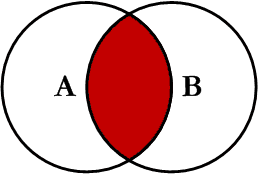

In [31]:
df_orders = pl.DataFrame(
    {
        "order_id": ["a", "b", "c"],
        "customer_id": [1, 2, 2],
        "amount": [100, 200, 300],
    }
)
print(df_orders)

shape: (3, 3)
┌──────────┬─────────────┬────────┐
│ order_id ┆ customer_id ┆ amount │
│ ---      ┆ ---         ┆ ---    │
│ str      ┆ i64         ┆ i64    │
╞══════════╪═════════════╪════════╡
│ a        ┆ 1           ┆ 100    │
│ b        ┆ 2           ┆ 200    │
│ c        ┆ 2           ┆ 300    │
└──────────┴─────────────┴────────┘


In [32]:
df_customers = pl.DataFrame(
    {
        "customer_id": [1, 2, 3],
        "name": ["Alice", "Bob", "Charlie"],
    }
)
print(df_customers)

shape: (3, 2)
┌─────────────┬─────────┐
│ customer_id ┆ name    │
│ ---         ┆ ---     │
│ i64         ┆ str     │
╞═════════════╪═════════╡
│ 1           ┆ Alice   │
│ 2           ┆ Bob     │
│ 3           ┆ Charlie │
└─────────────┴─────────┘


In [34]:
df_inner_customer_join = df_customers.join(df_orders, on="customer_id", 
                                           how="inner")
print(df_inner_customer_join)

shape: (3, 4)
┌─────────────┬───────┬──────────┬────────┐
│ customer_id ┆ name  ┆ order_id ┆ amount │
│ ---         ┆ ---   ┆ ---      ┆ ---    │
│ i64         ┆ str   ┆ str      ┆ i64    │
╞═════════════╪═══════╪══════════╪════════╡
│ 1           ┆ Alice ┆ a        ┆ 100    │
│ 2           ┆ Bob   ┆ b        ┆ 200    │
│ 2           ┆ Bob   ┆ c        ┆ 300    │
└─────────────┴───────┴──────────┴────────┘


#### 9.5 left Join

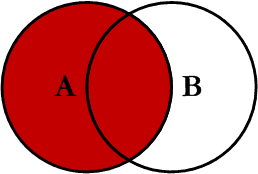

In [36]:
df_orders = pl.DataFrame(
    {
        "order_id": ["a", "b", "c"],
        "customer_id": [1, 2, 2],
        "amount": [100, 200, 300],
    }
)
print(df_orders)


df_customers = pl.DataFrame(
    {
        "customer_id": [1, 2, 3],
        "name": ["Alice", "Bob", "Charlie"],
    }
)
print(df_customers)

df_left_join = df_customers.join(df_orders, on="customer_id", how="left")
print(df_left_join)

shape: (3, 3)
┌──────────┬─────────────┬────────┐
│ order_id ┆ customer_id ┆ amount │
│ ---      ┆ ---         ┆ ---    │
│ str      ┆ i64         ┆ i64    │
╞══════════╪═════════════╪════════╡
│ a        ┆ 1           ┆ 100    │
│ b        ┆ 2           ┆ 200    │
│ c        ┆ 2           ┆ 300    │
└──────────┴─────────────┴────────┘
shape: (3, 2)
┌─────────────┬─────────┐
│ customer_id ┆ name    │
│ ---         ┆ ---     │
│ i64         ┆ str     │
╞═════════════╪═════════╡
│ 1           ┆ Alice   │
│ 2           ┆ Bob     │
│ 3           ┆ Charlie │
└─────────────┴─────────┘
shape: (4, 4)
┌─────────────┬─────────┬──────────┬────────┐
│ customer_id ┆ name    ┆ order_id ┆ amount │
│ ---         ┆ ---     ┆ ---      ┆ ---    │
│ i64         ┆ str     ┆ str      ┆ i64    │
╞═════════════╪═════════╪══════════╪════════╡
│ 1           ┆ Alice   ┆ a        ┆ 100    │
│ 2           ┆ Bob     ┆ b        ┆ 200    │
│ 2           ┆ Bob     ┆ c        ┆ 300    │
│ 3           ┆ Charlie ┆ null  

#### 9.6 Right Join

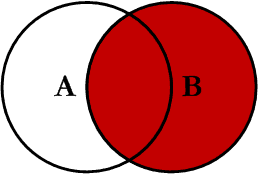

In [37]:
df_right_join = df_orders.join(df_customers, on="customer_id", how="right")
print(df_right_join)

shape: (4, 4)
┌──────────┬────────┬─────────────┬─────────┐
│ order_id ┆ amount ┆ customer_id ┆ name    │
│ ---      ┆ ---    ┆ ---         ┆ ---     │
│ str      ┆ i64    ┆ i64         ┆ str     │
╞══════════╪════════╪═════════════╪═════════╡
│ a        ┆ 100    ┆ 1           ┆ Alice   │
│ b        ┆ 200    ┆ 2           ┆ Bob     │
│ c        ┆ 300    ┆ 2           ┆ Bob     │
│ null     ┆ null   ┆ 3           ┆ Charlie │
└──────────┴────────┴─────────────┴─────────┘


#### 9.7 Full Outer Join

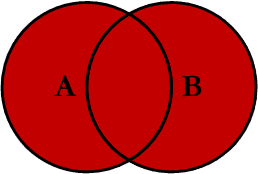

In [38]:
df_outer_join = df_customers.join(df_orders, on="customer_id", how="full")
print(df_outer_join)

shape: (4, 5)
┌─────────────┬─────────┬──────────┬───────────────────┬────────┐
│ customer_id ┆ name    ┆ order_id ┆ customer_id_right ┆ amount │
│ ---         ┆ ---     ┆ ---      ┆ ---               ┆ ---    │
│ i64         ┆ str     ┆ str      ┆ i64               ┆ i64    │
╞═════════════╪═════════╪══════════╪═══════════════════╪════════╡
│ 1           ┆ Alice   ┆ a        ┆ 1                 ┆ 100    │
│ 2           ┆ Bob     ┆ b        ┆ 2                 ┆ 200    │
│ 2           ┆ Bob     ┆ c        ┆ 2                 ┆ 300    │
│ 3           ┆ Charlie ┆ null     ┆ null              ┆ null   │
└─────────────┴─────────┴──────────┴───────────────────┴────────┘


#### 9.8 Cross Join